# EDA - Medicamentos
## 0. Previos

Se cargan las bases y las librerías a utilizar.

In [3]:
# Librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
# Base de interés
base = pd.read_excel('C:/Users/monic/documentos/ds4a/project/data/Medicamentos.xlsx')
base.head()

,Id,Fecha_Emision,Regional_EPS_Desc,Codigo_Prestacion_Op,Descripcion_Prestacion,Codigo_Diagnostico_EPS_Op,Diagnostico_EPS_Desc,Numero_Cantidad_Prestaciones
0,940545,2020-02-25,Medellin,M025848,TACROLIMUS MONOHIDRATADO -INDICACIONES DIFEREN...,L309,"DERMATITIS, NO ESPECIFICADA",1.0
1,725649,2020-02-26,Medellin,M029434,MONTELUKAST/LEVOCETIRIZINA DIHIDROCLORURO,J304,"RINITIS ALÉRGICA, NO ESPECIFICADA",28.0
2,535255,2020-02-27,Medellin,M026578,FLUTICASONA PROPIONATO/SALMETEROL,D848,OTRAS INMUNODEFICIENCIAS ESPECIFICADAS,1.0
3,1127795,2020-02-28,Medellin,M004049,DOXICICLINA,N760,VAGINITIS AGUDA,28.0
4,1673566,2020-02-25,Medellin,M280151,BECLOMETASONA NASAL,Z929,HISTORIA PERSONAL DE TRATAMIENTO MÉDICO NO ESP...,1.0


In [5]:
# Base de ids
ids = pd.read_excel('C:/Users/monic/documentos/ds4a/project/data/Datos basicos.xlsx')
ids.head()

,ID,edad,genero,escolaridad,EstadoCivil,Preferencia,Departamento,Ciudad,Estrato,Zona,AcompaÃ±ante,NivelSocioEconomico,Ocupacion,Regimen,TipoAfiliacion,RelacionLaboral,FE_NACIMIENTO
0,500547,58.0,M,SECUNDARIA,CASADO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,3.0,URBANA,PACIENTE,A,EMPLEADO,CONTRIBUTIVO,COTIZANTE,EMPLEADO,1962-05-19 00:00:00
1,500588,15.0,M,PRIMARIA,SOLTERO (A),NaN,CUNDINAMARCA,BOGOTA,2.0,URBANA,MADRE,B,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2004-12-19 00:00:00
2,502989,29.0,M,UNIVERSITARIO,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,3.0,URBANA,MADRE,A,SIN DEFINIR,CONTRIBUTIVO,BENEFICIARIO,SIN EMPLEO,1990-08-22 00:00:00
3,506808,11.0,M,EDAD PREESCOLAR,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,BELLO,1.0,URBANA,MADRE,A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2008-10-06 00:00:00
4,512938,22.0,F,SECUNDARIA,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,3.0,URBANA,PACIENTE,A,EMPLEADO,CONTRIBUTIVO,COTIZANTE,EMPLEADO,1997-10-15 00:00:00


## 1. Tipos

In [6]:
base.describe()

,Id,Numero_Cantidad_Prestaciones
count,1.095960e+05,108343.000000
mean,1.645011e+07,26.667814
std,8.874313e+08,42.183389
min,4.175940e+05,1.000000
25%,8.940550e+05,1.000000
50%,1.255124e+06,10.000000
75%,1.650612e+06,30.000000
max,9.905281e+10,1080.000000


In [7]:
base.dtypes

Id                                       int64
Fecha_Emision                   datetime64[ns]
Regional_EPS_Desc                       object
Codigo_Prestacion_Op                    object
Descripcion_Prestacion                  object
Codigo_Diagnostico_EPS_Op               object
Diagnostico_EPS_Desc                    object
Numero_Cantidad_Prestaciones           float64
dtype: object

Los tipos son consistentes con lo esperado: 

* Identificación es de tipo numérico
* Fecha_Emision es fecha
* Regional, descripción, código prestación, diagnóstico son texto
* Número de prestaciones es numérico

## 2. Aporte Conceptual

Se espera entender la cantidad de medicamentos que toma cada paciente y entender la relación de éstos con la adherencia.

## 3. Calidad
### 3.6 Cruce con la tabla de identificaciones

In [8]:
# Identificaciones únicas en la tabla de pacientes: 872
ids_unicos = ids.groupby(['ID'])['edad'].count().reset_index()
ids_unicos.describe()

,ID,edad
count,8.720000e+02,872.000000
mean,1.259526e+06,1.017202
std,4.343817e+05,0.138642
min,5.005470e+05,1.000000
25%,8.887368e+05,1.000000
50%,1.258122e+06,1.000000
75%,1.647997e+06,1.000000
max,1.999629e+06,3.000000


In [11]:
# Identificaciones únias en la tabla de Calidad: 146
ids_base = base.groupby(['Id'])['Fecha_Emision'].count().reset_index(name = 'cuenta')
ids_base.describe()

,Id,cuenta
count,1.267000e+03,1267.000000
mean,2.806378e+08,86.500395
std,3.903347e+09,116.373197
min,4.175940e+05,1.000000
25%,1.066926e+06,8.000000
50%,1.650612e+06,46.000000
75%,3.940880e+07,119.000000
max,9.905281e+10,1040.000000


In [13]:
# Cruce de las dos tablas
cruce = ids_base.merge(ids_unicos, how = 'inner', left_on = 'Id', right_on ='ID')
cruce.describe()

,Id,cuenta,ID,edad
count,8.320000e+02,832.000000,8.320000e+02,832.000000
mean,1.257381e+06,128.530048,1.257381e+06,1.018029
std,4.307089e+05,124.361654,4.307089e+05,0.141887
min,5.005470e+05,2.000000,5.005470e+05,1.000000
25%,8.896975e+05,48.000000,8.896975e+05,1.000000
50%,1.258122e+06,89.000000,1.258122e+06,1.000000
75%,1.639418e+06,165.000000,1.639418e+06,1.000000
max,1.999629e+06,1040.000000,1.999629e+06,3.000000


Se encuentra que **no** todos los pacientes de la tabla de calidad están en la tabla de datos demográficos. Solamente cruzan 823 pacientes.

In [25]:
# Base con cruce
base_ = base.merge( ids_unicos, how='inner', left_on = ['Id'], right_on = ['ID'] )
print("La base se reduce de " + str(base.shape[0]) + " registros, para quedar en " + str(base_.shape[0]) + " registros.")

La base se reduce de 109596 registros, para quedar en 106937 registros.


## 4. Exploración
### 4.1 Distribuciones
### Fecha_Emision

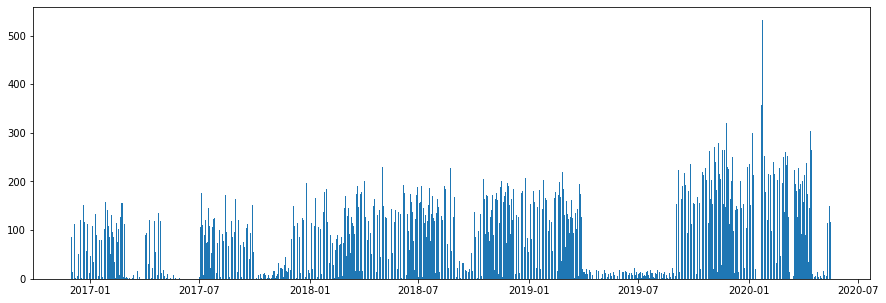

In [26]:
# plot
base_gf = base_.groupby('Fecha_Emision').count().reset_index()

fig, ax = plt.subplots(figsize=(15, 5))
rects1 = ax.bar(base_gf['Fecha_Emision'], base_gf['Id'] )

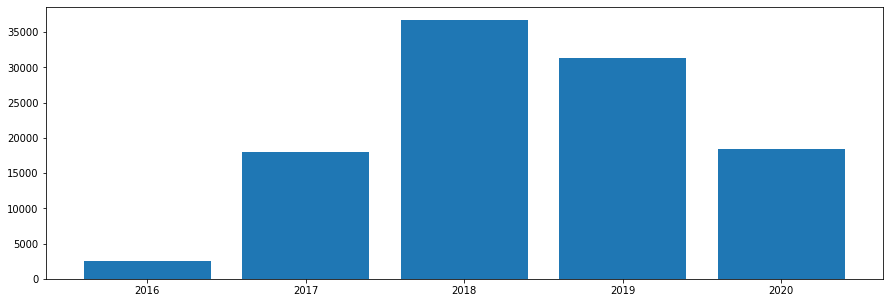

In [27]:
base_gf['year'] = base_gf['Fecha_Emision'].apply( lambda x: x.year )
base_gf_gy = base_gf.groupby('year')['Id'].sum().reset_index()

fig, ax = plt.subplots(figsize=(15, 5))
rects1 = ax.bar(base_gf_gy['year'], base_gf_gy['Id'] )

Se encuentra que la mayoría de los registros están desde 2017, no tienen una distribución uniforme desde ese momento.

### Regional_EPS_Desc

C:\Users\monic\Anaconda3\envs\case_1.2_var2\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


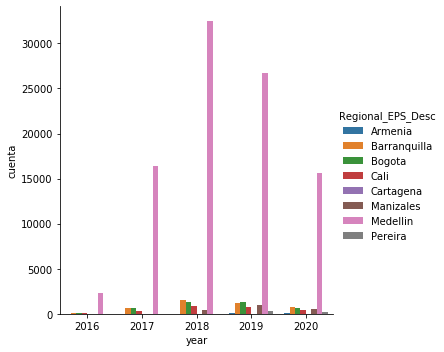

In [33]:
base_['year'] = base_['Fecha_Emision'].apply( lambda x: x.year )

base_gdy = base_.groupby(['Regional_EPS_Desc', 'year'])['Id'].count().reset_index( name = 'cuenta')
base_gdy_pivot = base_gdy.pivot('Regional_EPS_Desc', 'year', 'cuenta')

sns.factorplot(x='year', y='cuenta', hue='Regional_EPS_Desc', data=base_gdy, kind='bar')

La mayor proporción de las encuestas son en Medellín, puede ser buena idea centrar los análisis para esa ciudad.

### Codigo_Prestacion_Op y Descripcion_Prestacion

In [44]:
bgp = base_.groupby(['Codigo_Prestacion_Op','Descripcion_Prestacion'])['Id'].count().reset_index(name = 'cuenta')
bgp.groupby('Codigo_Prestacion_Op')['cuenta'].count().reset_index(name='cuenta').sort_values('cuenta', ascending = False)

,Codigo_Prestacion_Op,cuenta
163,M009033,3
4,M001110,3
905,M026900,3
1400,M283104,3
414,M021043,3
...,...,...
504,M022042,1
503,M022040,1
502,M022034,1
501,M022018,1


In [45]:
bgp[bgp['Codigo_Prestacion_Op']=='M009033']

,Codigo_Prestacion_Op,Descripcion_Prestacion,cuenta
171,M009033,ACETATO DE BETAMETASONA/FOSFATO S?DICO DE BETA...,14
172,M009033,ACETATO DE BETAMETASONA/FOSFATO SÓDICO DE BETA...,68
173,M009033,BETAMETASONA BASE/BETAMETASONA ACETATO,17


In [46]:
bgp[bgp['Codigo_Prestacion_Op']=='M001110']

,Codigo_Prestacion_Op,Descripcion_Prestacion,cuenta
4,M001110,SALES DE REHIDRATACI?N ORAL DEXTROSA/CLORURO D...,24
5,M001110,SALES DE REHIDRATACIÓN ORAL,166
6,M001110,SALES DE REHIDRATACIÓN ORAL DEXTROSA/CLORURO D...,98


A pesar de que hay distintas descripciones para el mismo código, se puede entender que se está hablando del mismo medicamento. Así que se ignorará la descripción y se debe trabajar con los códigos.

De la descripción del problema, Omnivida nos informó que la primera letra de los códigos es relevante para el análisis. Ya que cuanto ésta sea una `J` significa que estamos hablando de una enfermedad relacionada con asma.

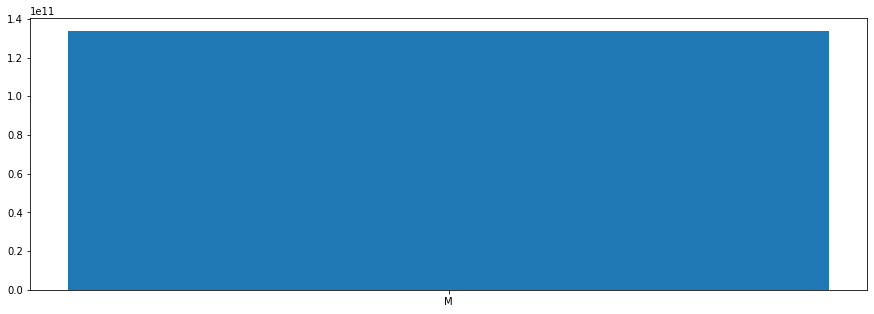

In [56]:
base_['cod_prestacion'] = base_['Codigo_Prestacion_Op'].apply( lambda x : x[0] )
base_gf_gy = base_.groupby('cod_prestacion')['Id'].sum().reset_index()

fig, ax = plt.subplots(figsize=(15, 5))
rects1 = ax.bar(base_gf_gy['cod_prestacion'], base_gf_gy['Id'] )

En este caso todos los medicamentos comienzan con `M`.

### Codigo_Diagnostico_EPS_Op y Diagnostico_EPS_Desc

In [60]:
bgp = base_.groupby(['Codigo_Diagnostico_EPS_Op','Diagnostico_EPS_Desc'])['Id'].count().reset_index(name = 'cuenta')
bgp.groupby('Codigo_Diagnostico_EPS_Op')['cuenta'].count().reset_index(name='cuenta').sort_values('cuenta', ascending = False)

,Codigo_Diagnostico_EPS_Op,cuenta
1169,Z988,2
760,M255,2
188,E840,2
189,E841,2
998,R55X,2
...,...,...
412,I269,1
414,I272,1
415,I280,1
416,I351,1


In [61]:
bgp[bgp['Codigo_Diagnostico_EPS_Op']=='Z988']

,Codigo_Diagnostico_EPS_Op,Diagnostico_EPS_Desc,cuenta
1350,Z988,OTROS ESTADOS POSTQUIR?RGICOS ESPECIFICADOS,5
1351,Z988,OTROS ESTADOS POSTQUIRÚRGICOS ESPECIFICADOS,5


In [62]:
bgp[bgp['Codigo_Diagnostico_EPS_Op']=='M255']

,Codigo_Diagnostico_EPS_Op,Diagnostico_EPS_Desc,cuenta
888,M255,DOLOR EN ARTICULACI?N,14
889,M255,DOLOR EN ARTICULACIÓN,239


In this case we can see than we need to trust in the codes, given that due special characters we have duplicated descriptions. Let's analyze the first leter of the code to see if has any information.

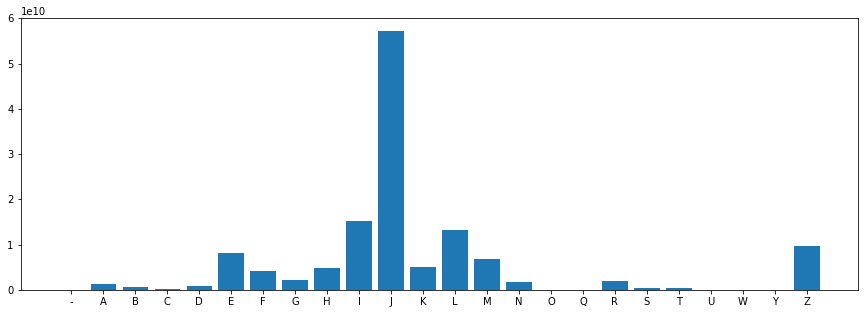

In [71]:
base_['cod_diagnostico'] = base_['Codigo_Diagnostico_EPS_Op'].apply( lambda x : str(x)[0] )
base_gf_gy = base_.groupby('cod_diagnostico')['Id'].sum().reset_index()

fig, ax = plt.subplots(figsize=(15, 5))
rects1 = ax.bar(base_gf_gy['cod_diagnostico'], base_gf_gy['Id'] )

As we can see most of the diagnosis is for asma related deseases.

### Numero_Cantidad_Prestaciones

Text(0.5, 0, 'Tipo de Enferemedad')

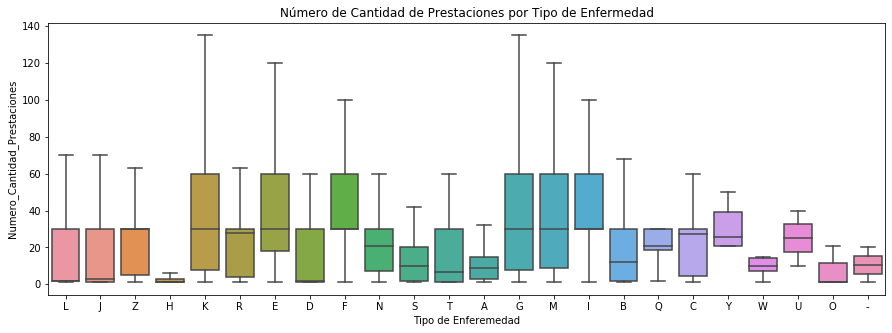

In [78]:
# Define figure size, create plot
fig, ax = plt.subplots(figsize=(15, 5))
m = sns.boxplot(
    x="cod_diagnostico",
    y="Numero_Cantidad_Prestaciones",
    #hue="cod_diagnostico",
    data=base_,
    showfliers=False,
)

# Format plot
#plt.legend(loc="lower left")
plt.title("Número de Cantidad de Prestaciones por Tipo de Enfermedad")
#plt.xticks(rotation=90)
plt.xlabel("Tipo de Enferemedad")
#plt.ylabel("PM2.5_WHO")

In [82]:
base_[base_['Numero_Cantidad_Prestaciones']>150].head()

,Id,Fecha_Emision,Regional_EPS_Desc,Codigo_Prestacion_Op,Descripcion_Prestacion,Codigo_Diagnostico_EPS_Op,Diagnostico_EPS_Desc,Numero_Cantidad_Prestaciones,ID,edad,year,cod_prestacion,cod_diagnostico
29,940545,2016-12-26,Medellin,M019569,MONTELUKAST S?DICO,J450,ASMA PREDOMINANTEMENTE AL?RGICA,180.0,940545,1,2016,M,J
40,940545,2017-02-03,Medellin,M019569,MONTELUKAST S?DICO,J450,ASMA PREDOMINANTEMENTE AL?RGICA,180.0,940545,1,2017,M,J
73,940545,2018-03-02,Medellin,M028975,MONTELUKAST SÓDICO-INDICACIONES DIFERENTES RES...,J450,ASMA PREDOMINANTEMENTE ALÉRGICA,180.0,940545,1,2018,M,J
100,940545,2018-08-10,Medellin,M028975,MONTELUKAST SÓDICO-INDICACIONES DIFERENTES RES...,J450,ASMA PREDOMINANTEMENTE ALÉRGICA,180.0,940545,1,2018,M,J
532,535255,2018-06-28,Medellin,M019251,DOMPERIDONA,K210,ENFERMEDAD DEL REFLUJO GASTROESOFÁGICO CON ESO...,180.0,535255,1,2018,M,K


In [83]:
base_.describe()

,Id,Numero_Cantidad_Prestaciones,ID,edad,year
count,1.069370e+05,105684.000000,1.069370e+05,106937.000000,106937.000000
mean,1.250623e+06,26.607074,1.250623e+06,1.014317,2018.422903
std,4.336494e+05,41.980133,4.336494e+05,0.135628,1.031779
min,5.005470e+05,1.000000,5.005470e+05,1.000000,2016.000000
25%,8.878120e+05,1.000000,8.878120e+05,1.000000,2018.000000
50%,1.240215e+06,10.000000,1.240215e+06,1.000000,2018.000000
75%,1.629016e+06,30.000000,1.629016e+06,1.000000,2019.000000
max,1.999629e+06,1080.000000,1.999629e+06,3.000000,2020.000000


Se encuentran valores positivos para la variable `Numero_Cantidad_Prestaciones`. Hay valores muy altos, y se ve que esto depende del tipo de enferemedad.

## 5. Definiciones Modelo de Datos
### 5.1 Transformación y Limpieza

* Esta tabla debería consolidarse a nivel ID, Fecha. Esto implica una definición de variables explicativas ya que un paciente puede aparecer más de una vez por mes.

* Si el cruce se hace por fecha (i.e. YYYYMM) es necesario realizar esta transformación en la variable `Fecha_Emision`

In [88]:
base_['month'] = base_['Fecha_Emision'].apply( lambda x: x.month )
base_.groupby(['Id','year','month'])['Fecha_Emision'].count().reset_index(name='cuenta').\
      sort_values('cuenta', ascending = False).head(10)

,Id,year,month,cuenta
7493,1090949,2020,2,63
7494,1090949,2020,3,52
7490,1090949,2019,11,49
193,524006,2017,7,47
7476,1090949,2018,8,47
1787,649629,2020,2,44
7479,1090949,2018,12,44
9015,1216245,2020,1,44
389,535255,2019,11,42
9002,1216245,2018,10,41


In [92]:
base_[ (base_['Id'] == 1090949) & (base_['year'] == 2020) & (base_['month'] == 2) ].\
    sort_values(['Codigo_Diagnostico_EPS_Op','Fecha_Emision']).head(10)

,Id,Fecha_Emision,Regional_EPS_Desc,Codigo_Prestacion_Op,Descripcion_Prestacion,Codigo_Diagnostico_EPS_Op,Diagnostico_EPS_Desc,Numero_Cantidad_Prestaciones,ID,edad,year,cod_prestacion,cod_diagnostico,month
4230,1090949,2020-02-03,Medellin,M284001,EMPAGLIFLOZINA,E108,"DIABETES MELLITUS INSULINODEPENDIENTE, CON COM...",30.0,1090949,1,2020,M,E,2
4213,1090949,2020-02-03,Medellin,M281088,ROSUVASTATINA,E109,"DIABETES MELLITUS INSULINODEPENDIENTE, SIN MEN...",30.0,1090949,1,2020,M,E,2
4211,1090949,2020-02-10,Medellin,M281330,METFORMINA,E109,"DIABETES MELLITUS INSULINODEPENDIENTE, SIN MEN...",23.0,1090949,1,2020,M,E,2
4057,1090949,2020-02-28,Medellin,M281330,METFORMINA,E109,"DIABETES MELLITUS INSULINODEPENDIENTE, SIN MEN...",30.0,1090949,1,2020,M,E,2
4072,1090949,2020-02-28,Medellin,M281088,ROSUVASTATINA,E109,"DIABETES MELLITUS INSULINODEPENDIENTE, SIN MEN...",30.0,1090949,1,2020,M,E,2
4195,1090949,2020-02-03,Medellin,M025360,LIRAGLUTIDE,E118,"DIABETES MELLITUS NO INSULINODEPENDIENTE, CON ...",3.0,1090949,1,2020,M,E,2
4212,1090949,2020-02-03,Medellin,M022134,FENOFIBRATO,E785,HIPERLIPIDEMIA NO ESPECIFICADA,30.0,1090949,1,2020,M,E,2
4191,1090949,2020-02-03,Medellin,M019665,BUPROPION,F331,"TRASTORNO DEPRESIVO RECURRENTE, EPISODIO MODER...",30.0,1090949,1,2020,M,F,2
4207,1090949,2020-02-03,Medellin,M281150,QUETIAPINA FUMARATO,F411,TRASTORNO DE ANSIEDAD GENERALIZADA,60.0,1090949,1,2020,M,F,2
4065,1090949,2020-02-28,Medellin,M281150,QUETIAPINA FUMARATO,F411,TRASTORNO DE ANSIEDAD GENERALIZADA,60.0,1090949,1,2020,M,F,2


### 5.2 Modelo de Datos

El cruce debe hacerce por `Id` y `Fecha_Emision`. Habiendo realizado una consolidación de la información.

### 5.3 Definición de Variables

* Número de dosis entregadas por mes para cada uno de los tipos de enfermedad.
* Promedio de las dosis entregadas por mes para cada uno de los tipos de enfermedad (en los últimos $n$ meses).
* Variación de la entrega de dosis por enferemedad (hoy vs hace $n$ meses).
* ¿Padece la enferemedad? (sí/no), para cada una de las $m$ enferemedades.